In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df=pd.read_csv(r'jena_climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
df=df[5::6]
df.index=pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


<Axes: xlabel='Date Time'>

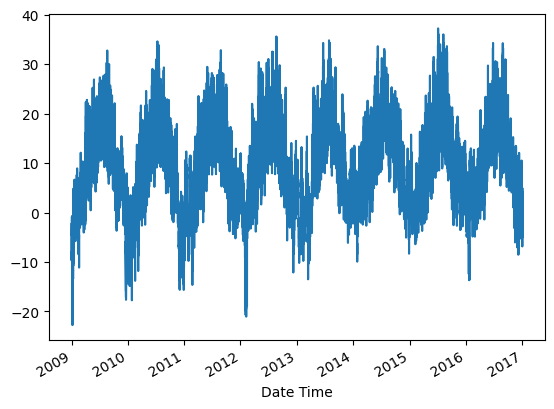

In [5]:
temp=df['T (degC)'[:100]]
temp.plot()

In [ ]:
def df_to_x_y(df, window_size=16):
    df_as_np=df.to_numpy()
    x=[]
    y=[]
    for i in range (len(df_as_np)-window_size):
        row=[[a] for a in df_as_np[i:i+16]]
        x.append(row)
        label= df_as_np[i+16]
        y.append(label)
    return np.array(x), np.array(y)

In [ ]:
Window=16
x,y= df_to_x_y(temp,Window)
x.shape, y.shape

((70076, 15, 1), (70076,))

In [8]:
x_train, y_train=x[:55000],y[:55000]
x_val, y_val=x[55000:61000],y[55000:61000]
x_test, y_test=x[61000:],y[61000:]

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

models= Sequential()
models.add(InputLayer((5,1)))
models.add(LSTM(1028))
models.add(Dense(512,'relu'))
models.add(Dense(256,'relu'))
models.add(Dense(128,'relu'))
models.add(Dense(64,'relu'))
models.add(Dense(32,'relu'))
models.add(Dense(1,'linear'))

models.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1028)           │     4,235,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       526,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,936,801 (18.83 MB)

 Trainable params: 4,936,801 (18.83 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
cp= ModelCheckpoint('models/.keras', save_best_only=True)
models.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=.0001),metrics=[RootMeanSquaredError()])


In [11]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

models.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=20, callbacks=[cp,early_stop])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 136s 78ms/step - loss: 10.1334 - root_mean_squared_error: 2.7424 - val_loss: 0.9133 - val_root_mean_squared_error: 0.9557
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 134s 78ms/step - loss: 0.6475 - root_mean_squared_error: 0.8045 - val_loss: 0.9293 - val_root_mean_squared_error: 0.9640


In [12]:
from tensorflow.keras.models import load_model

models=load_model('models/.keras')

In [13]:
train= models.predict(x_train).flatten()
results=pd.DataFrame(data={"Trained Prediction": train, "Actuals":y_train})
results

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step


,Trained Prediction,Actuals
0,-5.487140,-5.40
1,-5.248687,-5.37
2,-5.251079,-5.25
3,-5.158588,-5.11
4,-4.994599,-4.90
...,...,...
54995,19.041084,18.74
54996,19.544876,18.87
54997,19.423923,20.07
54998,20.599649,20.11


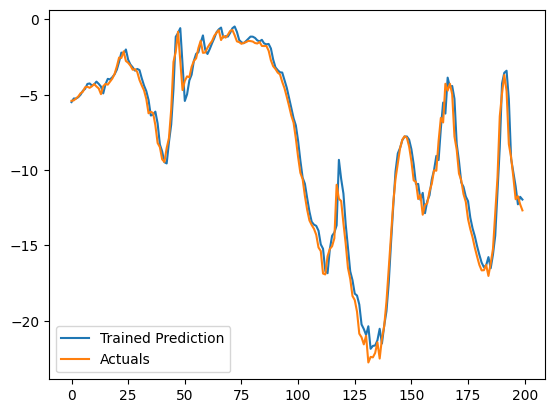

In [14]:
import matplotlib.pyplot as plt
plt.plot(results['Trained Prediction'][:200])
plt.plot(results['Actuals'][:200])
plt.legend(results, loc= "lower left")

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


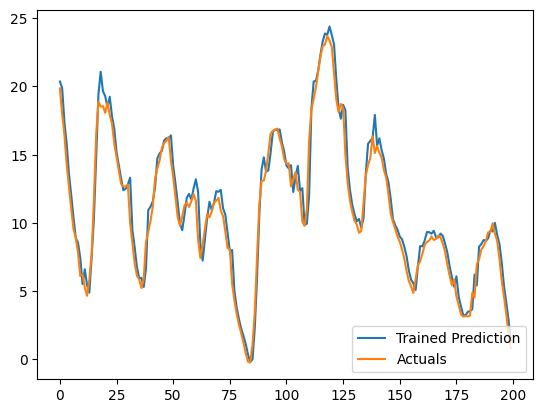

In [15]:
valid_predict= models.predict(x_val).flatten()
results=pd.DataFrame(data={"Trained Prediction":valid_predict, "Actuals":y_val})
results

plt.plot(results['Trained Prediction'][:200])
plt.plot(results['Actuals'][:200])
plt.legend(results, loc= "lower right")

In [16]:
test= models.predict(x_test).flatten()
results=pd.DataFrame(data={"Trained Prediction": test, "Actuals":y_test})
results



284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


,Trained Prediction,Actuals
0,8.188790,7.66
1,7.491852,6.69
2,6.471561,6.68
3,6.530531,6.65
4,6.670318,6.76
...,...,...
9071,-1.166752,-0.98
9072,-1.590416,-1.40
9073,-1.761051,-2.75
9074,-2.927875,-2.89


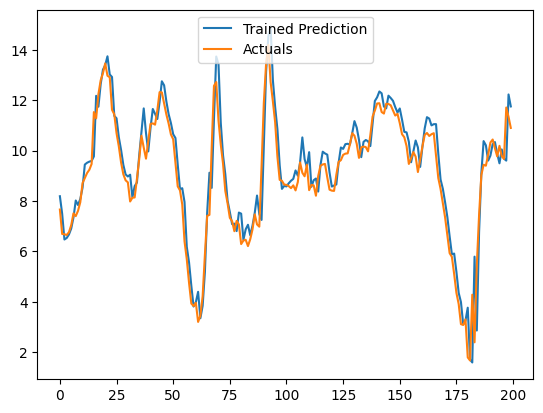

In [17]:
plt.plot(results['Trained Prediction'][:200])
plt.plot(results['Actuals'][:200])
plt.legend(results, loc= "upper center")